<a href="https://colab.research.google.com/github/Ayeshaaa777/Drug_recommender/blob/main/drug_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/drugscom_train.csv")

In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
df.shape

(161297, 7)

In [6]:
df=df.drop(columns=['Unnamed: 0'])

In [7]:
df=df.drop(columns=['date'])

In [8]:
df.head()

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37


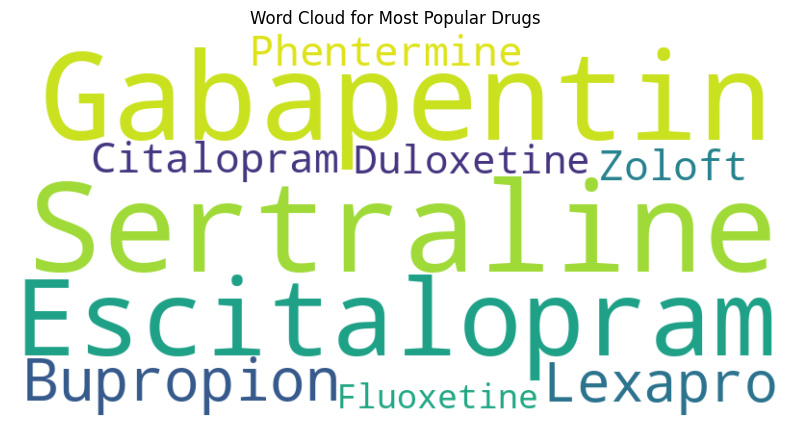

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aggregate counts of each drug
drug_counts = df.groupby('drugName')['usefulCount'].sum().reset_index()

# Get the top N most popular drugs
top_n_drugs = drug_counts.nlargest(10, 'usefulCount')  # Change 10 to the desired number of top drugs

# Convert drug names and counts to dictionary for word cloud generation
drug_dict = dict(zip(top_n_drugs['drugName'], top_n_drugs['usefulCount']))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(drug_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Popular Drugs')
plt.axis('off')
plt.show()

In [10]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [12]:
review_list = list(df.review)

In [13]:
sentiments = []
positive = []
negative = []
neutral = []
compound = []

In [14]:
for text in review_list:

  #Performing Vader Analysis on each review.
  com = analyser.polarity_scores(text)["compound"]
  pos = analyser.polarity_scores(text)["pos"]
  neu = analyser.polarity_scores(text)["neu"]
  neg = analyser.polarity_scores(text)["neg"]

  #Adding each value to the corresponding array
  positive.append(pos)
  negative.append(neg)
  neutral.append(neu)
  compound.append(com)
  sentiments.append({"Review":text,
                     "Positive": pos,
                     "Negative": neg,
                     "Neutral": neu,
                     "Compound": com})

sentiments_data = pd.DataFrame.from_dict(sentiments)

In [15]:
#Visualizing data from vader analysis.
sentiments_data

,Review,Positive,Negative,Neutral,Compound
0,"""It has no side effect, I take it in combinati...",0.000,0.121,0.879,-0.2960
1,"""My son is halfway through his fourth week of ...",0.108,0.018,0.874,0.9174
2,"""I used to take another oral contraceptive, wh...",0.080,0.059,0.861,0.6160
3,"""This is my first time using any form of birth...",0.089,0.026,0.885,0.7184
4,"""Suboxone has completely turned my life around...",0.168,0.061,0.771,0.9403
...,...,...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.143,0.037,0.820,0.9366
161293,"""I was given this in IV before surgey. I immed...",0.086,0.139,0.775,-0.4767
161294,"""Limited improvement after 4 months, developed...",0.135,0.462,0.404,-0.7430
161295,"""I&#039;ve been on thyroid medication 49 years...",0.113,0.066,0.821,0.8503


In [16]:
sentiments_data.shape

(161297, 5)

In [17]:
first_row_value = sentiments_data.loc[4, 'Review']
print(first_row_value)

"Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."


In [18]:
# Step 1: Find the maximum value in the "Positive" column
max_positive_value = sentiments_data['Positive'].max()

# Step 2: Filter the DataFrame to get the review with the highest positive value
review_with_max_positive = sentiments_data.loc[sentiments_data['Positive'] == max_positive_value]

# Step 3: Print the review with the highest positive value
print("Review with the highest positive value:")
print(review_with_max_positive)

Review with the highest positive value:
                         Review  Positive  Negative  Neutral  Compound
1090                    "Great"       1.0       0.0      0.0    0.6249
1112           "Great miracle."       1.0       0.0      0.0    0.8360
1914                  "Awesome"       1.0       0.0      0.0    0.6249
2193                     "Good"       1.0       0.0      0.0    0.4404
2452                 "Amazing."       1.0       0.0      0.0    0.5859
...                         ...       ...       ...      ...       ...
157315                   "Good"       1.0       0.0      0.0    0.4404
157344              "Excellent"       1.0       0.0      0.0    0.5719
158046  "Definitely effective."       1.0       0.0      0.0    0.7003
160281              "Brilliant"       1.0       0.0      0.0    0.5859
160920                   "Nice"       1.0       0.0      0.0    0.4215

[184 rows x 5 columns]


In [52]:
#Adding the sentiment analysis columns to the our dataset.
df["Positive"] = positive
df["Negative"] = negative
df["Neutral"] = neutral
df["Compound"] = compound
df["Review_Sentiment"] = ''


In [54]:
df.head()

,drugName,condition,review,Review_Sentiment,rating,usefulCount,Positive,Negative,Neutral,Compound
9892,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",,10,6,0.000,0.121,0.879,-0.2960
18402,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",,10,20,0.108,0.018,0.874,0.9174
67773,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I was diagnosed in January 2011. My own immun...",,9,6,0.080,0.059,0.861,0.6160
68300,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I recently found out about my positive status...",,7,26,0.089,0.026,0.885,0.7184
137301,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I was diagnosed in 2007 and had since never h...",,10,9,0.168,0.061,0.771,0.9403


In [50]:
df.info

<bound method DataFrame.info of                                     drugName  \
9892               A + D Cracked Skin Relief   
18402                             A / B Otic   
67773   Abacavir / dolutegravir / lamivudine   
68300   Abacavir / dolutegravir / lamivudine   
137301  Abacavir / dolutegravir / lamivudine   
...                                      ...   
146374                                  ella   
160576                                  ella   
24189                                 femhrt   
127350                                femhrt   
578                                   femhrt   

                                         condition  \
9892                      Bacterial Skin Infection   
18402                                 Otitis Media   
67773                                HIV Infection   
68300                                HIV Infection   
137301                               HIV Infection   
...                                            ...   
146374                     Emergency Contraception   
160576                     Emergency Contraception   
24189   0</span> users found this comment helpful.   
127350                                        Acne   
578                        Postmenopausal Symptoms   

                                                   review Review_Sentiment  \
9892    "I have severe cracked skin on my hands.  I&#0...         Positive   
18402   "It numbs the pain. It makes my ear feel heavi...         Positive   
67773   "I was diagnosed in January 2011. My own immun...         Negative   
68300   "I recently found out about my positive status...         Positive   
137301  "I was diagnosed in 2007 and had since never h...          Neutral   
...                                                   ...              ...   
146374  "Had a small accident early hours of 18th June...         Negative   
160576  "So I took Ellaone when I wasn&rsquo;t quite s...         Positive   
24189   "I was on femHRT for four months and had BV (b...         Negative   
127350  "Recently switched from birth conrtol which ke...         Negative   
578     "This medication completely changed my life fo...         Negative   

        rating  usefulCount  
9892        10            6  
18402       10           20  
67773        9            6  
68300        7           26  
137301      10            9  
...        ...          ...  
146374       8            1  
160576       4            0  
24189        1            0  
127350       1            2  
578         10           42  

[161297 rows x 6 columns]>

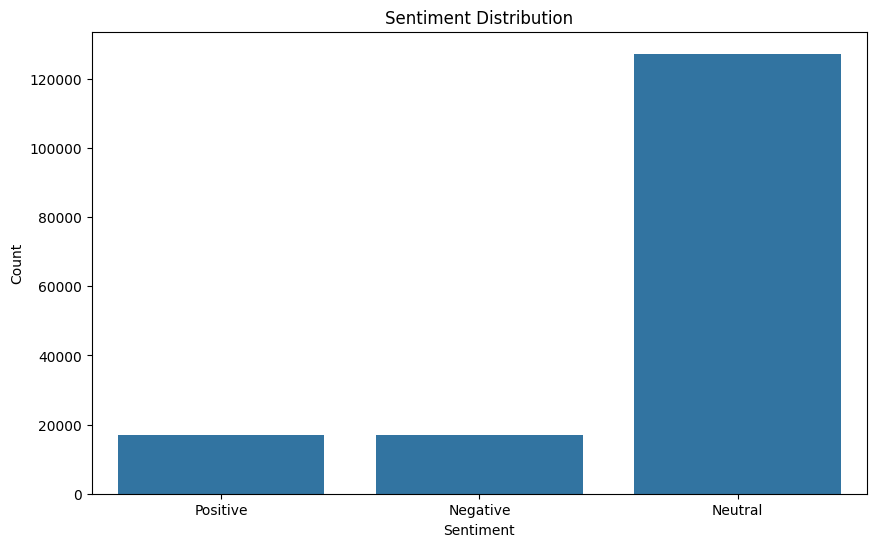

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data into a DataFrame called df

# Create a bar plot
plt.figure(figsize=(10, 6))

# Count the occurrences of each sentiment
sentiment_counts = df[['Positive', 'Negative', 'Neutral']].sum()

# Plot the counts
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Show plot
plt.show()


Based on the compound value we can determine whether the overall sentiment of the review is postive, negative or neutral. Below will be the threshold we shall be using for classifying the review sentiment class:

Positive sentiment: compound score >= 0.05

Neutral sentiment : -0.05 < compound score < 0.05

Negative sentiment: compound score <= -0.05

In [22]:
df.loc[df['Compound'] >= 0.05, 'Review_Sentiment'] = 'Positive'
df.loc[df['Compound'] <= -0.05, 'Review_Sentiment'] = 'Negative'
df["Review_Sentiment"].replace('', 'Neutral', inplace = True)


In [23]:

#Dropping the columns Positive, Negative, Neutral and Compound.
df = df.drop(columns = ["Positive", "Negative", "Neutral", "Compound"])


In [24]:
# Rearranging the columns in different order.
df = df[[ "drugName", "condition","review", "Review_Sentiment", "rating", "usefulCount"]]


In [25]:
df.head()

,drugName,condition,review,Review_Sentiment,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",Negative,9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",Positive,8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",Positive,5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",Positive,8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",Positive,9,37


In [26]:
#Exporting this merged dataset as csv file.
df.to_csv(f'/content/drive/MyDrive/Sentiment_analysis.csv', index=False)

**Weighted average of rating and useful count**


In [27]:
df.head()

,drugName,condition,review,Review_Sentiment,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",Negative,9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",Positive,8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",Positive,5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",Positive,8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",Positive,9,37


In [28]:
#Sorting the data based on drug name
df = df.sort_values(['drugName'])

In [29]:

# Creating a function to calculate weighted average
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [30]:
df.groupby(["drugName"]).apply(wavg, "rating", "usefulCount")

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.753846
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                8.234631
                                          ...    
Zyvox                                    9.293629
ZzzQuil                                  1.450000
depo-subQ provera 104                         NaN
ella                                     8.171134
femhrt                                   9.590909
Length: 3436, dtype: float64

In [31]:
# Creating a dataframe of Drug and its average rating
data_wavg = pd.DataFrame(df.groupby(["drugName"]).apply(wavg, "rating", "usefulCount").reset_index())


In [32]:
data_wavg.head()

,drugName,0
0,A + D Cracked Skin Relief,10.000000
1,A / B Otic,10.000000
2,Abacavir / dolutegravir / lamivudine,8.753846
3,Abacavir / lamivudine / zidovudine,9.000000
4,Abatacept,8.234631


In [33]:
data_wavg = data_wavg.rename(columns={0: "Rating_Wavg"})

In [34]:
data_wavg.head()

,drugName,Rating_Wavg
0,A + D Cracked Skin Relief,10.000000
1,A / B Otic,10.000000
2,Abacavir / dolutegravir / lamivudine,8.753846
3,Abacavir / lamivudine / zidovudine,9.000000
4,Abatacept,8.234631


In [35]:

merged_wavg = pd.merge(data_wavg, df, on='drugName')

In [36]:
merged_wavg.head()

,drugName,Rating_Wavg,condition,review,Review_Sentiment,rating,usefulCount
0,A + D Cracked Skin Relief,10.000000,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",Positive,10,6
1,A / B Otic,10.000000,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",Positive,10,20
2,Abacavir / dolutegravir / lamivudine,8.753846,HIV Infection,"""I was diagnosed in January 2011. My own immun...",Negative,9,6
3,Abacavir / dolutegravir / lamivudine,8.753846,HIV Infection,"""I recently found out about my positive status...",Positive,7,26
4,Abacavir / dolutegravir / lamivudine,8.753846,HIV Infection,"""I was diagnosed in 2007 and had since never h...",Neutral,10,9


In [37]:
merged_wavg.shape

(161297, 7)

**Drug Recommendation**

In [38]:
merged_wavg = merged_wavg.sort_values(['condition','Rating_Wavg'],ascending=False, ignore_index=True).groupby('condition').head(161297)
merged_wavg

,drugName,Rating_Wavg,condition,review,Review_Sentiment,rating,usefulCount
0,Voltaren,8.854352,zen Shoulde,"""Great help""",Positive,8,33
1,Indomethacin,8.757336,zen Shoulde,"""It works.""",Neutral,10,12
2,Diclofenac,8.617426,zen Shoulde,"""While taking this medication I had increased ...",Negative,9,13
3,Diclofenac,8.617426,zen Shoulde,"""This medication has been a God send for me. ...",Negative,9,11
4,Diclofenac,8.617426,zen Shoulde,"""Great help""",Positive,8,33
...,...,...,...,...,...,...,...
160393,Depo-Provera,4.875840,0</span> users found this comment helpful.,"""Depo worked great for me. Reading people&#039...",Positive,10,0
160394,Depo-Provera,4.875840,0</span> users found this comment helpful.,"""I have liked depo, but today I started bleedi...",Positive,9,0
160395,Depo-Provera,4.875840,0</span> users found this comment helpful.,"""This the only birth control that gets rid of ...",Positive,9,0
160396,Ogestrel-28,4.200000,0</span> users found this comment helpful.,"""I have been on many different birth control p...",Positive,10,0


In [39]:
# Taking drugs only with positive reviews for recommendation
merged_wavg = merged_wavg.drop( merged_wavg[merged_wavg['Review_Sentiment'] == "Negative"].index)
merged_wavg = merged_wavg.drop( merged_wavg[merged_wavg['Review_Sentiment'] == "Neutral"].index)


In [40]:
merged_wavg.head()


,drugName,Rating_Wavg,condition,review,Review_Sentiment,rating,usefulCount
0,Voltaren,8.854352,zen Shoulde,"""Great help""",Positive,8,33
4,Diclofenac,8.617426,zen Shoulde,"""Great help""",Positive,8,33
5,Relafen,8.442509,zen Shoulde,"""I&#039;m probably the only one I know taking ...",Positive,7,50
6,Ibuprofen,8.428997,zen Shoulde,"""I&#039;ve found that taking ibuprofen (200 mg...",Positive,8,0
8,Naproxen,7.947768,zen Shoulde,"""Very little relief. I finished PT and after ...",Positive,2,6


In [41]:
# taking predicted disease as input and recommending drug based on highest weighted average of ratings
groupedByCount = merged_wavg.groupby(['condition', 'drugName', 'Rating_Wavg'])['usefulCount'].sum().reset_index()

In [42]:
groupedByCount


,condition,drugName,Rating_Wavg,usefulCount
0,0</span> users found this comment helpful.,Aviane,7.550182,0
1,0</span> users found this comment helpful.,Bepreve,6.694915,0
2,0</span> users found this comment helpful.,Cryselle,6.963415,0
3,0</span> users found this comment helpful.,Depo-Provera,4.875840,0
4,0</span> users found this comment helpful.,Drysol,9.385661,0
...,...,...,...,...
6392,zen Shoulde,Ibuprofen,8.428997,0
6393,zen Shoulde,Nabumetone,7.513756,50
6394,zen Shoulde,Naproxen,7.947768,6
6395,zen Shoulde,Relafen,8.442509,50


In [43]:
groupedByCondition = groupedByCount.groupby('condition')

In [44]:
recommended_drug = pd.DataFrame(groupedByCondition.get_group('ADHD').nlargest(3, ['Rating_Wavg', 'usefulCount']))
recommended_drug

,condition,drugName,Rating_Wavg,usefulCount
414,ADHD,ProCentra,10.000000,2
389,ADHD,Desoxyn,9.673103,1019
404,ADHD,Methamphetamine,9.591031,1035
